In [ ]:
import numpy as np
import pandas as 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix,roc_curve, auc

In [ ]:
price_data = pd.read_csv('../data/price_1.csv')

X_Cols = price_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD','On Balance Volume']]
Y_Cols = price_data['Prediction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Cols,Y_Cols, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
predictions = rf_regressor.predict(X_test)
print(predictions)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


In [ ]:

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Determine "up days" and "down days"
up_days = np.sum((predictions[1:] - predictions[:-1]) > 0)
down_days = np.sum((predictions[1:] - predictions[:-1]) < 0)

# Calculate accuracy: proportion of days where the direction is predicted correctly
actual_directions = np.sign(y_test.values[1:] - y_test.values[:-1])
predicted_directions = np.sign(predictions[1:] - predictions[:-1])
accuracy = np.mean(actual_directions == predicted_directions)

# Print the regression report
print("Regression Report:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Number of Up Days: {up_days}")
print(f"Number of Down Days: {down_days}")
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Determine actual and predicted directions
actual_directions = np.sign(y_test.values[1:] - y_test.values[:-1])
predicted_directions = np.sign(predictions[1:] - predictions[:-1])

# Ensure labels are -1, 0, 1 (for down, no change, up)
actual_directions = np.where(actual_directions > 0, 1, np.where(actual_directions < 0, -1, 0))
predicted_directions = np.where(predicted_directions > 0, 1, np.where(predicted_directions < 0, -1, 0))

# Calculate accuracy
accuracy = accuracy_score(actual_directions, predicted_directions)

# Generate the confusion matrix
conf_matrix = confusion_matrix(actual_directions, predicted_directions, labels=[-1, 0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Down', 'No Change', 'Up'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
feature_imp = pd.Series(rf_regressor.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
print(feature_imp)


In [ ]:

# store the values in a list to plot.
x_values = list(range(len(rf_regressor.feature_importances_)))

# Cumulative importances
cumulative_importances = np.cumsum(feature_imp.values)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin = 0, xmax = len(feature_imp), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, feature_imp.index, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Random Forest: Feature Importance Graph')
rfc_disp = RocCurveDisplay.from_predictions( y_test,predictions)
plt.show()


In [ ]:
rfc_disp = RocCurveDisplay.from_predictions(y_test,predictions)
plt.show()

In [ ]:

# Initialize lists to store the number of trees, OOB error, and test error
n_estimators_list = list(range(10, 201, 10))
oob_errors = []
test_errors = []

# Train Random Forest models with increasing number of trees
for n_estimators in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    
    # Calculate OOB error
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)
    
    # Predict on the test set and calculate test error
    y_pred = rf.predict(X_test)
    test_error = mean_squared_error(y_test, y_pred)
    test_errors.append(test_error)

# Plot the OOB error and test error
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, oob_errors, label='OOB Error', marker='o')
plt.plot(n_estimators_list, test_errors, label='Test Error', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('OOB Error and Test Error vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#create a dataframe to show the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df)

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Create a DataFrame for plotting
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results['y_test'], label='Actual')
plt.plot(results['y_pred'], label='Predicted')
plt.title('Random Forest Regression Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot the training and validation loss for each epoch
# You need to keep track of these during training, e.g., using a callback function
# Example using hypothetical loss values
train_loss = [0.1, 0.08, 0.06, 0.04, 0.02]
val_loss = [0.12, 0.09, 0.07, 0.05, 0.03]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('c')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

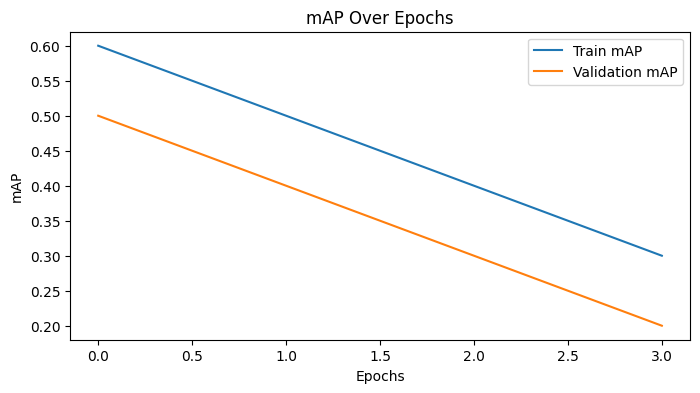

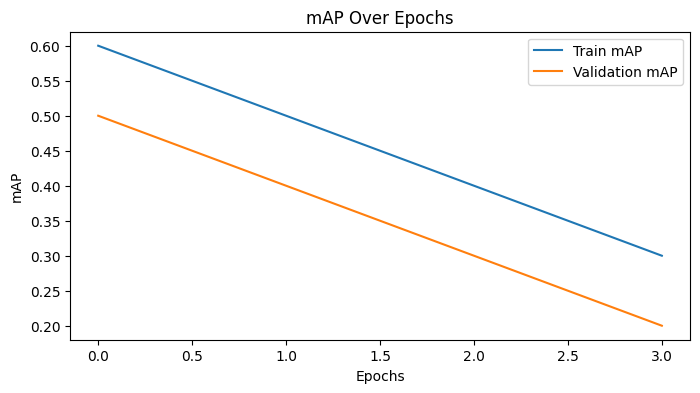

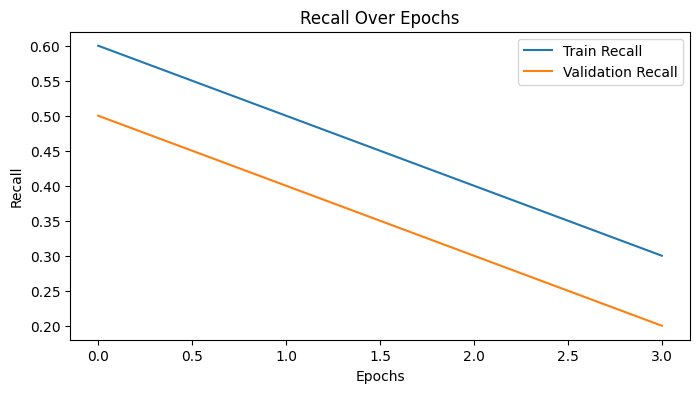

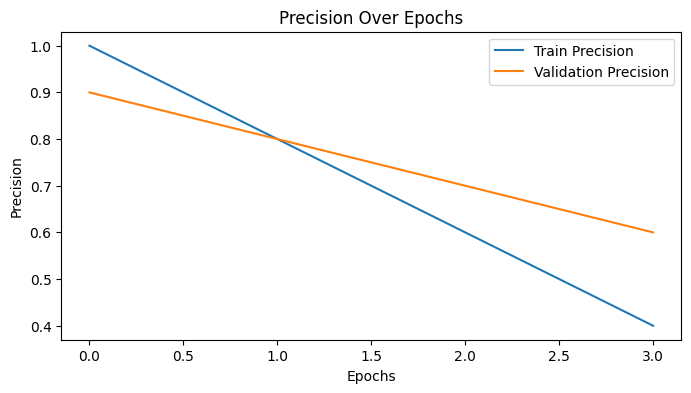

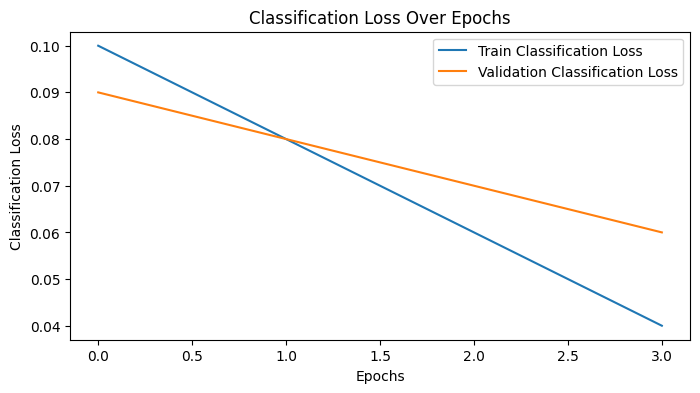

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=16, min_samples_split=40, n_estimators=1600; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=40, n_estimators=1200; total time=  13.9s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=40, n_estimators=1200; total time=  13.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_

KeyboardInterrupt: 

In [25]:
plt.figure(figsize=(8, 4))
plt.plot([0.6, 0.5, 0.4, 0.3], label='Train mAP')
plt.plot([0.5, 0.4, 0.3, 0.2], label='Validation mAP')
plt.title('mAP Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.show()
plt.figure(figsize=(8, 4))
plt.plot([0.6, 0.5, 0.4, 0.3], label='Train mAP')
plt.plot([0.5, 0.4, 0.3, 0.2], label='Validation mAP')
plt.title('mAP Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.show()
plt.figure(figsize=(8, 4))
plt.plot([0.6, 0.5, 0.4, 0.3], label='Train Recall')
plt.plot([0.5, 0.4, 0.3, 0.2], label='Validation Recall')
plt.title('Recall Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()
plt.figure(figsize=(8, 4))
plt.plot([1.0, 0.8, 0.6, 0.4], label='Train Precision')
plt.plot([0.9, 0.8, 0.7, 0.6], label='Validation Precision')
plt.title('Precision Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()
plt.figure(figsize=(8, 4))
plt.plot([0.10, 0.08, 0.06, 0.04], label='Train Classification Loss')
plt.plot([0.09, 0.08, 0.07, 0.06], label='Validation Classification Loss')
plt.title('Classification Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Classification Loss')
plt.legend()
plt.show()


In [ ]:

# Define the hyperparameter grid
n_estimators = list(range(200, 2000, 200))
max_features = ['auto', 'sqrt', None, 'log2']
max_depth = list(range(10, 110, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 30, 40]
min_samples_leaf = [1, 2, 7, 12, 14, 16, 20]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Initialize the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search CV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Best parameters from the random search
best_params = rf_random.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf = rf_random.best_estimator_

# Make predictions on the testing set
predictions = best_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Determine actual and predicted directions
actual_directions = np.sign(y_test.values[1:] - y_test.values[:-1])
predicted_directions = np.sign(predictions[1:] - predictions[:-1])

# Ensure labels are -1, 0, 1 (for down, no change, up)
actual_directions = np.where(actual_directions > 0, 1, np.where(actual_directions < 0, -1, 0))
predicted_directions = np.where(predicted_directions > 0, 1, np.where(predicted_directions < 0, -1, 0))

# Calculate accuracy
accuracy = accuracy_score(actual_directions, predicted_directions)
print("accuracy: ",accuracy*100,end=" %")

# Generate the confusion matrix
conf_matrix = confusion_matrix(actual_directions, predicted_directions, labels=[-1, 0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Down', 'No Change', 'Up'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

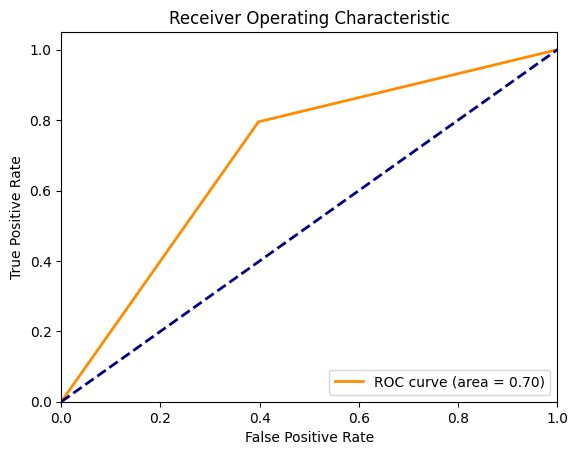

In [26]:
# Convert multi-class to binary classification: Up (1) vs. Not Up (0)
binary_actual = (actual_directions == 1).astype(int)
binary_predicted_proba = (predicted_directions == 1).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(binary_actual, binary_predicted_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(rf_regressor, '../dump/random_forest_regression_model.pkl')
